In [12]:
import pandas as pd

df_model = pd.read_excel("/content/drive/MyDrive/Internships/Prasunet Foundation-Data Science/dataset/cleaned_car_data.xlsx")

In [13]:


numerical_features = [
    'km_driven', 'avg_tyre_life%', 'mileage_kmpl', 'bootspace',
    'seating_capacity', 'fuel_tank_capacity', 'displacement',
    'car_age', 'used_years', 'insurance_remaining_months',
    'mileage_per_cc', 'bootspace_per_seat'
]

encoded_features = [
    'insurance_type_encoded', 'fuel_type_encoded', 'transmission_encoded',
    'car_location_encoded', 'tyre_life_encoded', 'fuel_efficiency_encoded'
]

# Add 'brand' (raw categorical) to the features to use
features_to_use = numerical_features + encoded_features
target = 'total_cost'

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df_model[features_to_use]
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 🐈‍⬛ CatBoost Regressor (No normalization needed)

In [7]:
!pip install --upgrade --force-reinstall numpy pandas catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.1 MB/s eta 0:00:00
  Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl.metadata (1.2 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.3 MB/s eta 0:00:00
Using cached catboost-1.2.7-cp311-cp311-manylinux2014_x86_64.whl (98.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 560.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 20.7 MB/s eta 0:00

In [15]:
from catboost import CatBoostRegressor
import numpy as np

# Train CatBoost Regressor
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
# Predict
cat_preds = cat_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, cat_preds)
rmse = np.sqrt(mean_squared_error(y_test, cat_preds))  # avoids squared=False for compatibility

print("CatBoost R2 Score:", round(r2, 4))
print("CatBoost RMSE:", round(rmse, 2))

CatBoost R2 Score: 0.8936
CatBoost RMSE: 164720.41


### 🌳 Random Forest Regressor (No normalization needed)

In [16]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

# R2 Score
print("Random Forest R2 Score:", r2_score(y_test, rf_preds))

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print("Random Forest RMSE:", rmse)


Random Forest R2 Score: 0.857986367200676
Random Forest RMSE: 190296.95082296667


🔍 Lasso Regression (Needs normalization)

In [17]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Lasso pipeline with scaling
lasso_model = make_pipeline(StandardScaler(), Lasso(alpha=1.0, random_state=42))
lasso_model.fit(X_train, y_train)

# Predictions
lasso_preds = lasso_model.predict(X_test)

# Evaluation
print("Lasso R2 Score:", r2_score(y_test, lasso_preds))
rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
print("Lasso RMSE:", rmse)

Lasso R2 Score: 0.7103819239556152
Lasso RMSE: 271756.3138537945


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.786e+12, tolerance: 2.513e+10
  model = cd_fast.enet_coordinate_descent(


In [18]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-19-df107561612c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feat_imp.values[:10], y=rf_feat_imp.index[:10], palette="viridis")
<ipython-input-19-df107561612c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_feat_imp.values[:10], y=cat_feat_imp.index[:10], palette="magma")
<ipython-input-19-df107561612c>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_feat_imp.values[:10], y=lasso_feat_imp.index[:10], palette="coolwarm")


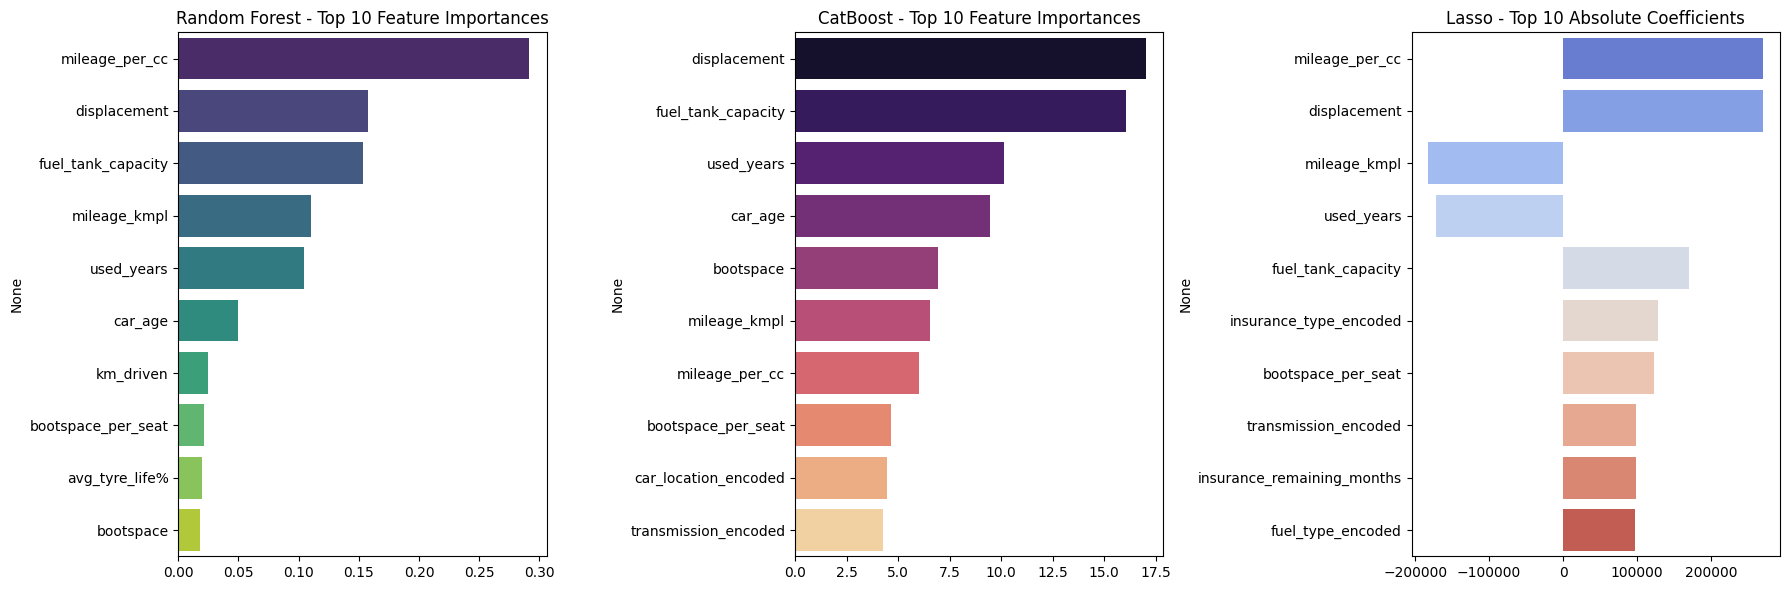

In [19]:


# Assuming df_model, X_test, y_test, and trained models exist in memory
# Feature names used in model training
feature_names = X_train.columns.tolist()

# Feature Importance - Random Forest
rf_importance = rf_model.feature_importances_
rf_feat_imp = pd.Series(rf_importance, index=feature_names).sort_values(ascending=False)

# Feature Importance - CatBoost (using built-in method)
cat_feat_imp = pd.Series(cat_model.get_feature_importance(), index=feature_names).sort_values(ascending=False)

# Feature Importance - Lasso (coefficients)
lasso_coef = lasso_model.named_steps['lasso'].coef_
lasso_feat_imp = pd.Series(lasso_coef, index=feature_names).sort_values(key=abs, ascending=False)

# Plotting all three
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(x=rf_feat_imp.values[:10], y=rf_feat_imp.index[:10], palette="viridis")
plt.title("Random Forest - Top 10 Feature Importances")

plt.subplot(1, 3, 2)
sns.barplot(x=cat_feat_imp.values[:10], y=cat_feat_imp.index[:10], palette="magma")
plt.title("CatBoost - Top 10 Feature Importances")

plt.subplot(1, 3, 3)
sns.barplot(x=lasso_feat_imp.values[:10], y=lasso_feat_imp.index[:10], palette="coolwarm")
plt.title("Lasso - Top 10 Absolute Coefficients")

plt.tight_layout()
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict
y_pred_gbr = gbr_model.predict(X_test)

# Evaluation
r2_gbr = r2_score(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print(f"Gradient Boosting R2 Score: {r2_gbr:.4f}")
print(f"Gradient Boosting RMSE: {rmse_gbr:.2f}")

Gradient Boosting R2 Score: 0.8691
Gradient Boosting RMSE: 182669.97


In [21]:
from xgboost import XGBRegressor

# Initialize and train the model
xgb_model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost R2 Score: {r2_xgb:.4f}")
print(f"XGBoost RMSE: {rmse_xgb:.2f}")

XGBoost R2 Score: 0.8901
XGBoost RMSE: 167428.55


In [22]:
from lightgbm import LGBMRegressor

# Initialize and train the model
lgbm_model = LGBMRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
lgbm_model.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
r2_lgbm = r2_score(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))

print(f"LightGBM R2 Score: {r2_lgbm:.4f}")
print(f"LightGBM RMSE: {rmse_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 722
[LightGBM] [Info] Number of data points in the train set: 656, number of used features: 18
[LightGBM] [Info] Start training from score 900473.509146
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

<ipython-input-23-a5944b065ff0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feats.values, y=top_feats.index, palette="viridis")


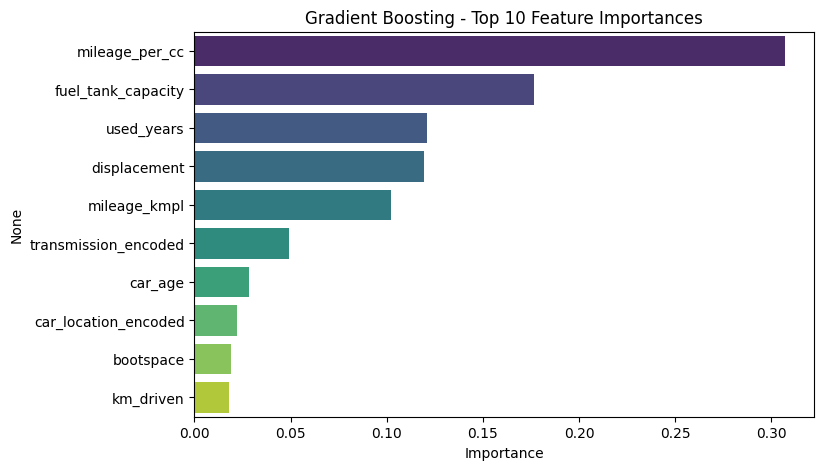

In [23]:

# Plot feature importance
feat_imp = pd.Series(gbr_model.feature_importances_, index=X_train.columns)
top_feats = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_feats.values, y=top_feats.index, palette="viridis")
plt.title("Gradient Boosting - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

<ipython-input-24-1c608a42c631>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feats.values, y=top_feats.index, palette="coolwarm")


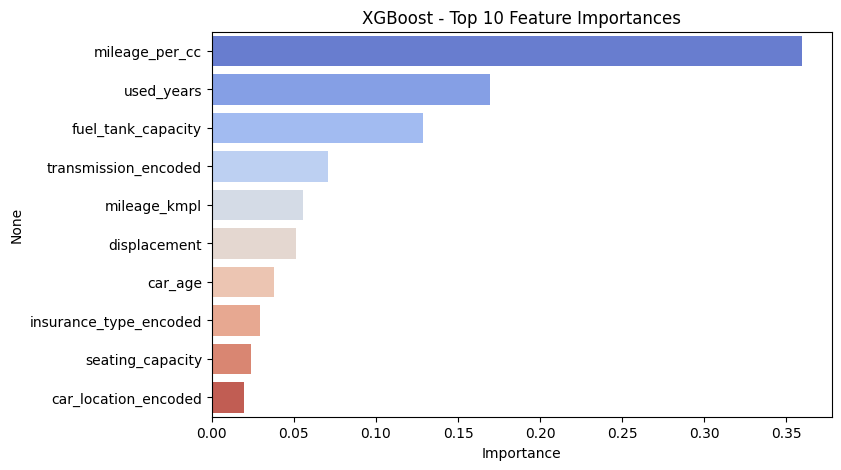

In [24]:

feat_imp = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
top_feats = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_feats.values, y=top_feats.index, palette="coolwarm")
plt.title("XGBoost - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

<ipython-input-25-3c1975714f11>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feats.values, y=top_feats.index, palette="plasma")


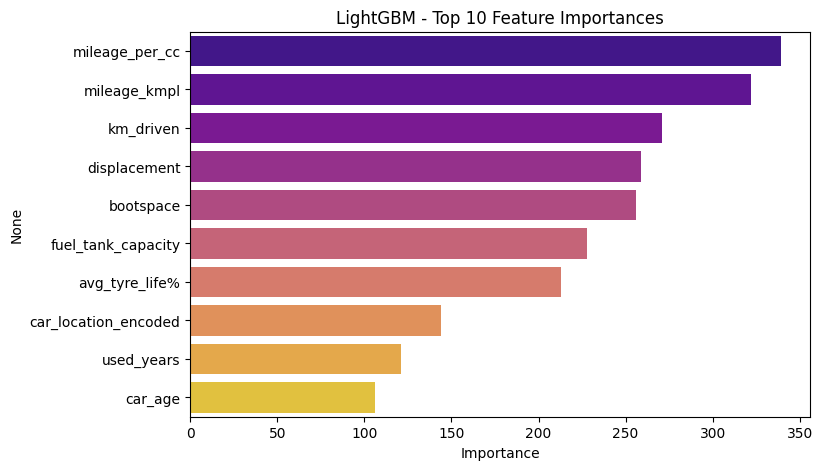

In [25]:
feat_imp = pd.Series(lgbm_model.feature_importances_, index=X_train.columns)
top_feats = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_feats.values, y=top_feats.index, palette="plasma")
plt.title("LightGBM - Top 10 Feature Importances")
plt.xlabel("Importance")
plt.show()

<ipython-input-26-ea66a5015494>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


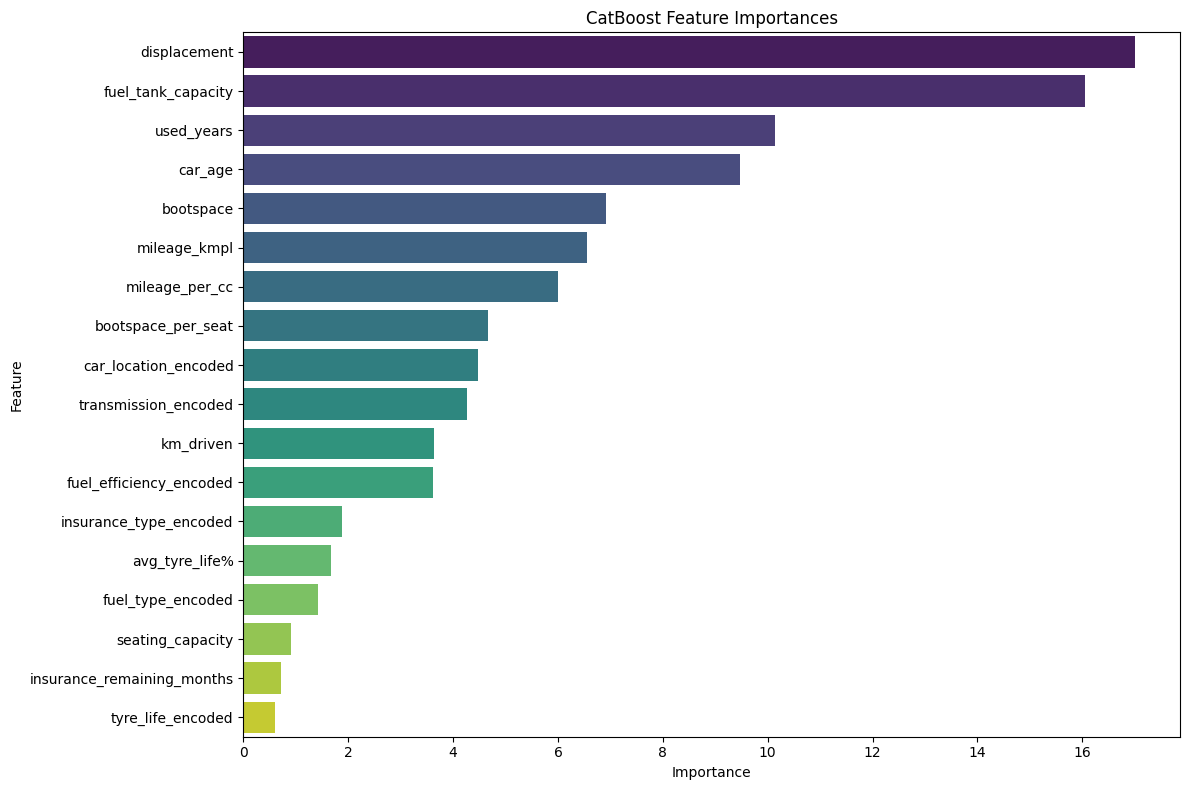

In [26]:
# Replace this with your actual model and feature list
importances = cat_model.get_feature_importance()
features = X_train.columns  # or the list of features you used

# Create a DataFrame for plotting
feature_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('CatBoost Feature Importances')
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds)
    adj_r2 = adjusted_r2(r2, len(y_test), X_test.shape[1])

    print(f"📊 Performance for: {model_name}")
    print(f"R² Score:     {r2:.4f}")
    print(f"Adjusted R²:  {adj_r2:.4f}")
    print(f"RMSE:         ₹{rmse:,.2f}")
    print(f"MAE:          ₹{mae:,.2f}")
    print(f"MAPE:         {mape:.2f}%")
    print("-" * 40)

    return preds

In [28]:
xgb_preds = evaluate_model(xgb_model, X_train, y_train, X_test, y_test, model_name="XGBoost")
cat_preds = evaluate_model(cat_model, X_train, y_train, X_test, y_test, model_name="CatBoost")
rf_preds = evaluate_model(rf_model, X_train, y_train, X_test, y_test, model_name="Random Forest")

📊 Performance for: XGBoost
R² Score:     0.8901
Adjusted R²:  0.8765
RMSE:         ₹167,428.55
MAE:          ₹107,858.23
MAPE:         373.14%
----------------------------------------
📊 Performance for: CatBoost
R² Score:     0.8936
Adjusted R²:  0.8805
RMSE:         ₹164,720.41
MAE:          ₹104,275.79
MAPE:         500.55%
----------------------------------------
📊 Performance for: Random Forest
R² Score:     0.8580
Adjusted R²:  0.8405
RMSE:         ₹190,296.95
MAE:          ₹120,782.78
MAPE:         215.76%
----------------------------------------


In [29]:
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# 1. Log-transform the target
df_model['log_total_cost'] = np.log1p(df_model['total_cost'])  # log(1 + x) to handle zeros

# 2. Define features and new log target
features_to_use = numerical_features + encoded_features
target = 'log_total_cost'

X = df_model[features_to_use]
y = df_model[target]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train CatBoost
cat_model = CatBoostRegressor(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# 5. Predict on log scale and transform back
log_preds = cat_model.predict(X_test)
actual_preds = np.expm1(log_preds)       # Reverse of log1p
actual_y_test = np.expm1(y_test)         # Reverse of log1p

# 6. Evaluate
r2 = r2_score(actual_y_test, actual_preds)
rmse = mean_squared_error(actual_y_test, actual_preds) ** 0.5
mae = mean_absolute_error(actual_y_test, actual_preds)
mape = np.mean(np.abs((actual_y_test - actual_preds) / actual_y_test)) * 100

# 7. Print results
print("📊 Log-Transformed CatBoost Performance")
print(f"R² Score:     {r2:.4f}")
print(f"RMSE:         ₹{rmse:,.2f}")
print(f"MAE:          ₹{mae:,.2f}")
print(f"MAPE:         {mape:.2f}%")

📊 Log-Transformed CatBoost Performance
R² Score:     0.8982
RMSE:         ₹161,105.72
MAE:          ₹100,135.73
MAPE:         16.58%


In [30]:
import numpy as np
import pandas as pd

# Predict on test set
log_preds = cat_model.predict(X_test)

# Convert predictions and true values back to original scale
actual_costs = np.expm1(y_test)
predicted_costs = np.expm1(log_preds)

# Create a DataFrame to view side-by-side
comparison_df = pd.DataFrame({
    'Actual Cost (₹)': actual_costs,
    'Predicted Cost (₹)': predicted_costs,
    'Difference (₹)': np.abs(actual_costs - predicted_costs)
})

# Round for cleaner view
comparison_df = comparison_df.round(2)

# Display first 10 predictions
print(comparison_df.head(10))


     Actual Cost (₹)  Predicted Cost (₹)  Difference (₹)
609         980034.0           864834.16       115199.84
174        1019370.0           917225.38       102144.62
67         1348710.0           750309.82       598400.18
168         984522.0          1073387.71        88865.71
275         489918.0           632995.49       143077.49
335         424860.0           523203.97        98343.97
807         183648.0           197381.80        13733.80
86         1641486.0          1650083.01         8597.01
539        1294722.0          1068195.47       226526.53
713        1082334.0          1077186.24         5147.76
